### Imports

In [6]:
import scipy as sp
import numpy as np
import matplotlib as plot
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from pandas import set_option
set_option('display.width',100)
set_option('display.precision',3)
import sklearn
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
cancer = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
cancer['target'] = cancer_dataset.target

# Chap 5

### Descriptive Statistics

In [12]:
print(cancer.shape)

(569, 31)


In [ ]:
# print(cancer.head(1))
print(cancer.dtypes)

In [11]:
cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Class Distribution

In [13]:
cancer.groupby('target').size()

target
0    212
1    357
dtype: int64

### Correlations

In [ ]:
print(cancer.corr(method='pearson'))

In [ ]:
cancer.skew()

### Cancer Selected Columns

In [22]:
print(cancer_dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [96]:
# selected_columns = ['mean radius', 'mean texture', 'mean perimeter','worst concavity','worst smoothness','mean symmetry','target']
selected_columns = ['mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter','worst concave points','target']
cancer_selected_columns = cancer[selected_columns]

In [ ]:
cancer_selected_columns

# Chap 6 

### Visualisations

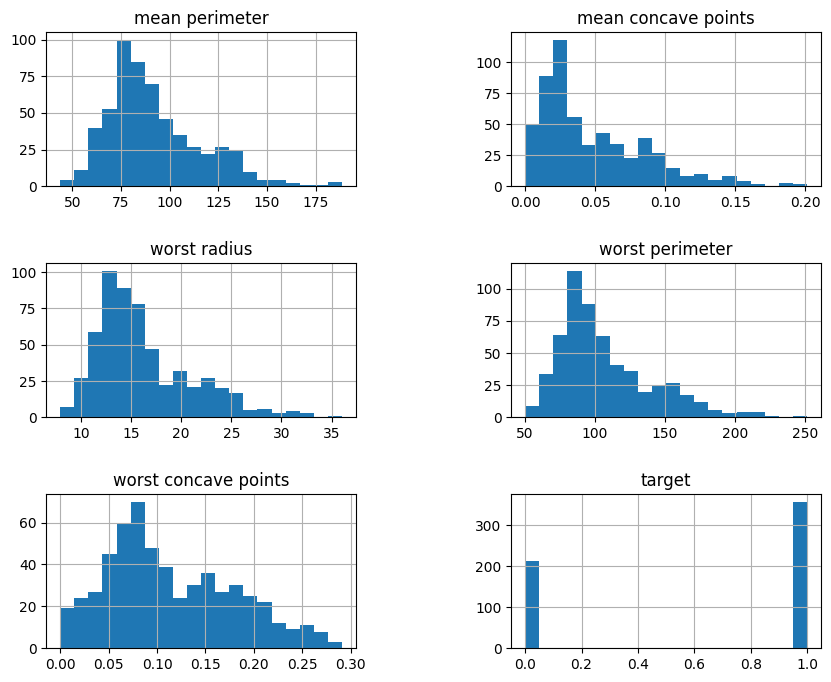

In [97]:
# Create histograms for the selected column
cancer_selected_columns.hist(figsize=(10, 8), bins=20)  # Adjust figsize as needed

# Adjust the layout to add more space between the histograms
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Increase hspace and wspace for more padding
plt.show()  # Display the histograms


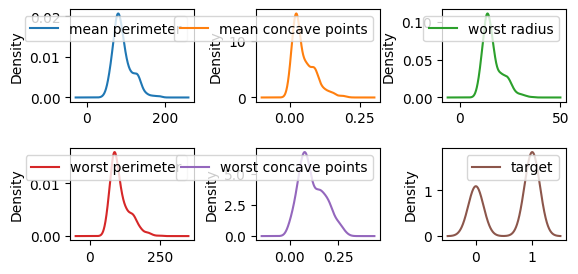

In [98]:
cancer_selected_columns.plot(kind='density', subplots=True, layout=(3,3),sharex=False)
# Adjust the layout to add more space between the histograms
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Increase hspace and wspace for more padding
plt.show()  # Display the histograms

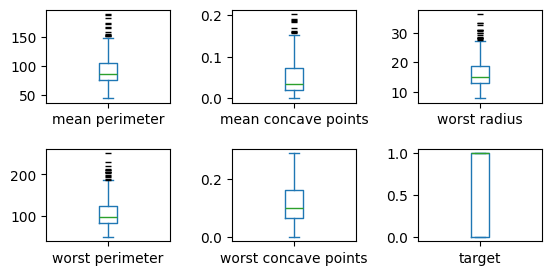

In [99]:
cancer_selected_columns.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,  flierprops=dict(marker='_', color='red', markersize=5) )
# Adjust the layout to add more space between the histograms
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Increase hspace and wspace for more padding
plt.show()  # Display the histograms

### Multivariate Plots

In [100]:
print(cancer_selected_columns.corr(method='pearson'))

                      mean perimeter  mean concave points  worst radius  worst perimeter  \
mean perimeter                 1.000                0.851         0.969            0.970   
mean concave points            0.851                1.000         0.830            0.856   
worst radius                   0.969                0.830         1.000            0.994   
worst perimeter                0.970                0.856         0.994            1.000   
worst concave points           0.771                0.910         0.787            0.816   
target                        -0.743               -0.777        -0.776           -0.783   

                      worst concave points  target  
mean perimeter                       0.771  -0.743  
mean concave points                  0.910  -0.777  
worst radius                         0.787  -0.776  
worst perimeter                      0.816  -0.783  
worst concave points                 1.000  -0.794  
target                              -

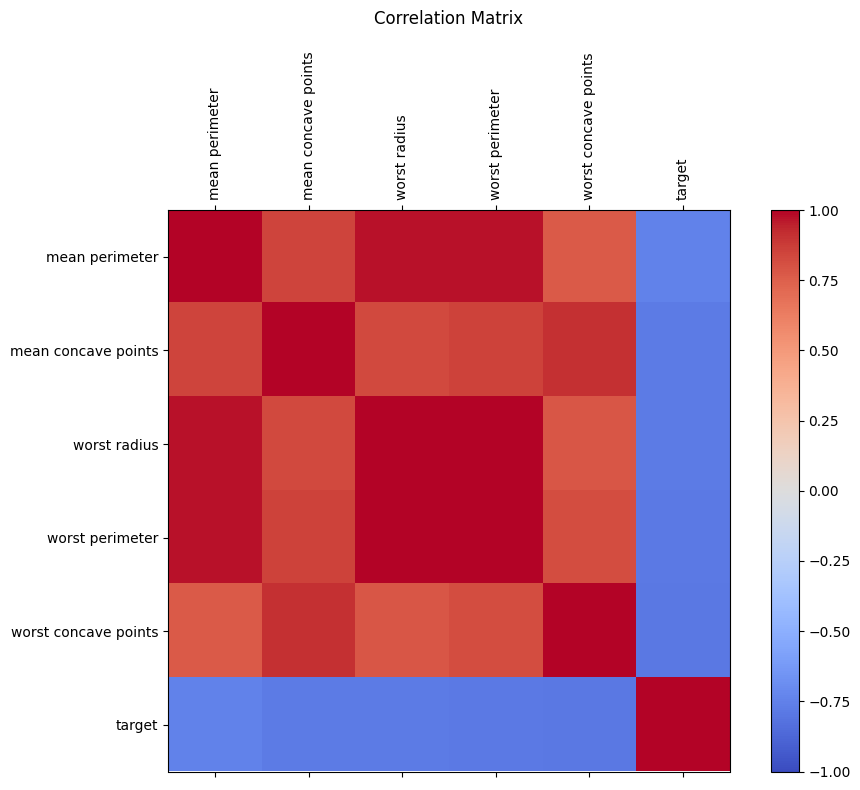

In [101]:
correlations = cancer_selected_columns.corr()
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figsize as needed
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm')  # Change colormap if desired
fig.colorbar(cax)

# Set ticks
ticks = np.arange(len(selected_columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(selected_columns, rotation=90, ha='center')  # Rotate x labels for better readability
ax.set_yticklabels(selected_columns)

# Add title
ax.set_title('Correlation Matrix', pad=20)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


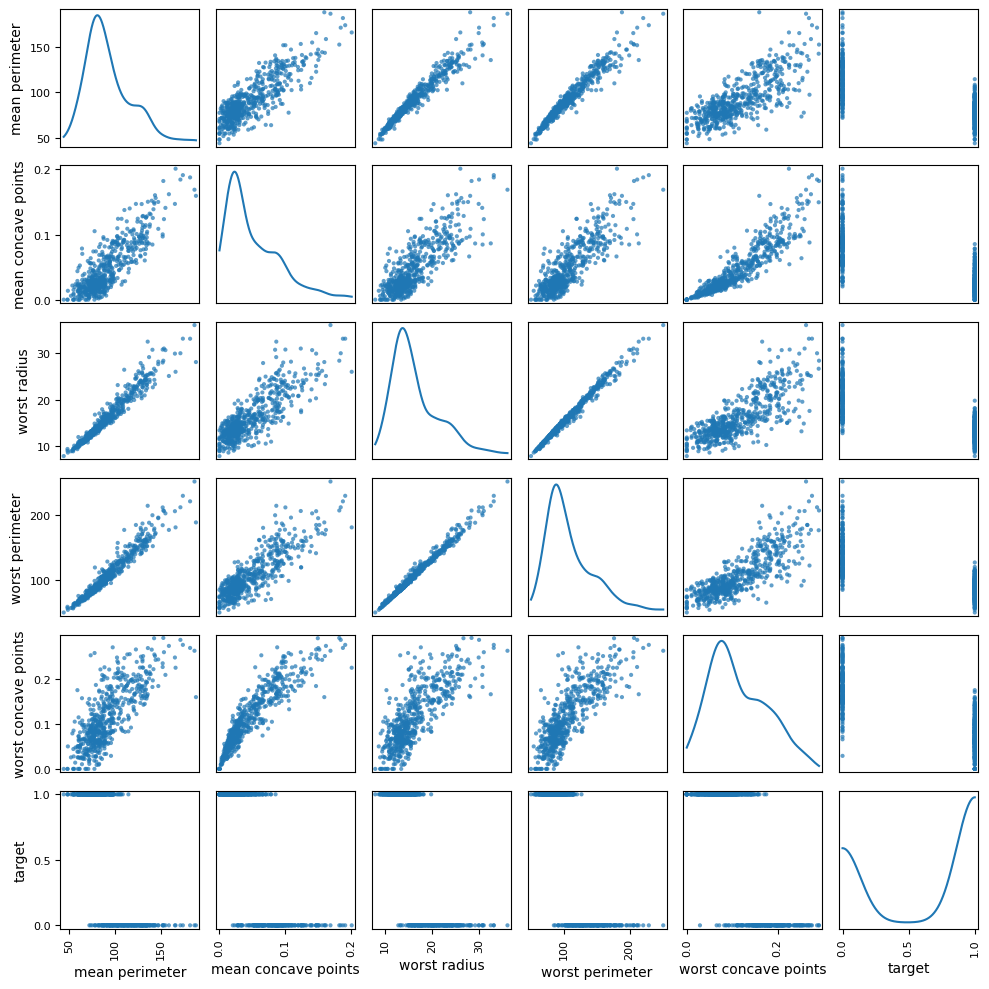

In [102]:
# Create a scatter matrix
scatter_matrix(cancer_selected_columns, figsize=(10, 10), diagonal='kde', alpha=0.7, grid=True)

# Adjust layout to improve spacing
plt.tight_layout()  # This will adjust the subplots to fit into the figure area nicely

# Show the plot
plt.show()


# Chap 7

### MinMaxScaler (Rescale)
- Transform / pre-processing tool
- If dataset attributes vary significantly - we can rescale all the values between 0 and 1
- Referred to as normalization
- Good for optimization algorithms like gradient decent;
- Also algorithms that weight inputs like regression and neural networks and distance based measures like KNN

In [46]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
set_printoptions(precision=3)

In [ ]:
print(cancer_selected_columns.shape)
print(cancer_selected_columns)

In [104]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(cancer_selected_columns)
measurements_scaled = scaler.transform(cancer_selected_columns)

In [105]:
print(measurements_scaled.shape)
print(measurements_scaled[1])

(569, 6)
[0.616 0.349 0.607 0.54  0.639 0.   ]


In [106]:
# Convert the scaled array back to a DataFrame with column names
rescaled_df = pd.DataFrame(measurements_scaled, columns=cancer_selected_columns.columns)
print(rescaled_df.iloc[0])

mean perimeter          0.546
mean concave points     0.731
worst radius            0.621
worst perimeter         0.668
worst concave points    0.912
target                  0.000
Name: 0, dtype: float64


### Standardize (StandardScaler)

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer_selected_columns)

StandardScaler()

In [108]:
measurements_scaled = scaler.transform(cancer_selected_columns)
print(measurements_scaled.shape)
print(measurements_scaled[1])

(569, 6)
[ 1.686  0.548  1.806  1.535  1.087 -1.298]


In [109]:
# Convert scaled array back to DataFrame with appropriate column names
measurements_rescaled_df = pd.DataFrame(measurements_scaled, columns=cancer_selected_columns.columns)
print(measurements_rescaled_df.iloc[1])

mean perimeter          1.686
mean concave points     0.548
worst radius            1.806
worst perimeter         1.535
worst concave points    1.087
target                 -1.298
Name: 1, dtype: float64


### Normalizer (Normalize Data)
- Unit Vector of 1.

In [110]:
from sklearn.preprocessing import Normalizer
set_printoptions(precision=3)

In [111]:
scaler = Normalizer()
scaler.fit(cancer_selected_columns)

Normalizer()

In [112]:
measurements_scaled = scaler.transform(cancer_selected_columns)
print(measurements_scaled.shape)
print(measurements_scaled[1])

(569, 6)
[6.372e-01 3.364e-04 1.198e-01 7.613e-01 8.918e-04 0.000e+00]


In [73]:
# Convert scaled array back to DataFrame with appropriate column names
measurements_rescaled_df = pd.DataFrame(measurements_scaled, columns=cancer_selected_columns.columns)
print(measurements_rescaled_df.iloc[1])

mean radius         1.516e-01
mean texture        1.310e-01
mean perimeter      9.797e-01
worst concavity     1.781e-03
worst smoothness    9.126e-04
mean symmetry       1.336e-03
target              0.000e+00
Name: 1, dtype: float64


### Binarize 

In [113]:
from sklearn.preprocessing import Binarizer
scaler = Binarizer()

In [114]:
scaler.fit(cancer_selected_columns)
measurements_scaled = scaler.transform(cancer_selected_columns)

In [115]:
print(measurements_scaled.shape)
print(measurements_scaled[1])

(569, 6)
[1. 1. 1. 1. 1. 0.]


In [116]:
# Convert scaled array back to DataFrame with appropriate column names
measurements_rescaled_df = pd.DataFrame(measurements_scaled, columns=cancer_selected_columns.columns)
print(measurements_rescaled_df.iloc[1])

mean perimeter          1.0
mean concave points     1.0
worst radius            1.0
worst perimeter         1.0
worst concave points    1.0
target                  0.0
Name: 1, dtype: float64


# Chap 8 

### Feature Selection

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

In [81]:
cancer_dataset = load_breast_cancer()
X = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
y = cancer_dataset.target

In [82]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [85]:
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

SelectKBest(k=5)

In [88]:
fit = selector.fit(X, y)
print(fit.scores_.shape)
print(fit.scores_)

(30,)
[6.470e+02 1.181e+02 6.972e+02 5.731e+02 8.365e+01 3.132e+02 5.338e+02
 8.617e+02 6.953e+01 9.346e-02 2.688e+02 3.909e-02 2.539e+02 2.437e+02
 2.558e+00 5.325e+01 3.901e+01 1.133e+02 2.412e-02 3.468e+00 8.608e+02
 1.496e+02 8.979e+02 6.616e+02 1.225e+02 3.043e+02 4.367e+02 9.644e+02
 1.189e+02 6.644e+01]


In [89]:
features = fit.transform(X)
print(features.shape)

(569, 5)


In [90]:
print(features)

[[1.228e+02 1.471e-01 2.538e+01 1.846e+02 2.654e-01]
 [1.329e+02 7.017e-02 2.499e+01 1.588e+02 1.860e-01]
 [1.300e+02 1.279e-01 2.357e+01 1.525e+02 2.430e-01]
 ...
 [1.083e+02 5.302e-02 1.898e+01 1.267e+02 1.418e-01]
 [1.401e+02 1.520e-01 2.574e+01 1.846e+02 2.650e-01]
 [4.792e+01 0.000e+00 9.456e+00 5.916e+01 0.000e+00]]


In [91]:
selector.get_support()

array([False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False])

In [92]:
X.columns[selector.get_support()]

Index(['mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter',
       'worst concave points'],
      dtype='object')

### Recursive Feature Selection
- Recursively removes attributes and building a model
- Uses model accuracy in determining the attributes that contribute most

In [118]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [119]:
model = LogisticRegression()

In [ ]:
rfe = RFE(estimator=model, n_features_to_select=5)
fit = rfe.fit(X, y)

In [121]:
print(X.columns[fit.support_])

Index(['mean concavity', 'radius error', 'worst compactness', 'worst concavity',
       'worst concave points'],
      dtype='object')


### Principle Component Analysis
- Uses linear algebra to transform the dataset into a compressed form
- Known as a **data reduction technique**
- Choose the number of dimensions or principle components in the transformed result.
- **PCA** is useful when you want to reduce dimensionality for visualization, to simplify models, or when working with high-dimensional data where many features may be correlated.

- **Feature selection methods** are more appropriate when you need to identify the most relevant features for predictive modeling, especially when interpretability of the model is important.

In [145]:
cancer_dataset = load_breast_cancer()
cancer = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
cancer['target'] = cancer_dataset.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer_dataset.data)
X_scaled = pd.DataFrame(X_scaled)
# X_scaled

In [122]:
from sklearn.decomposition import PCA

In [136]:
pca_Transformer = PCA(n_components=2)

In [146]:
pca_Transformer.fit(X_scaled)

PCA(n_components=2)

In [ ]:
pca_Transformer.components_

In [147]:
cancer_Reduced = pca_Transformer.transform(X_scaled)

In [148]:
cancer_Reduced.shape

(569, 2)

In [149]:
pd.DataFrame(cancer_Reduced)

,0,1
0,9.193,1.949
1,2.388,-3.768
2,5.734,-1.075
3,7.123,10.276
4,3.935,-1.948
...,...,...
564,6.439,-3.577
565,3.793,-3.584
566,1.256,-1.902
567,10.375,1.672


## Feature Importance Attribute
- Not all models have this attribute

In [151]:
cancer_dataset = load_breast_cancer()
X = cancer_dataset.data
y = cancer_dataset.target

In [154]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_

In [162]:
len(importances)

30

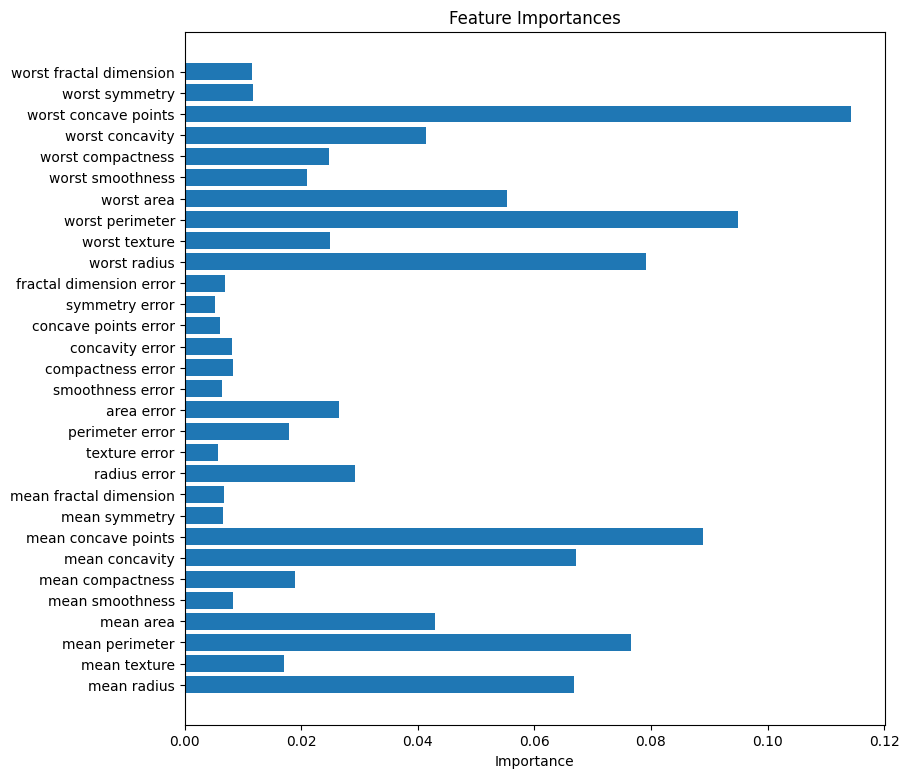

In [164]:
features = cancer_dataset.feature_names
plt.figure(figsize=(10, 9))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.yticks(rotation=0, ha='right')
plt.subplots_adjust(left=0.2)
plt.show()

8


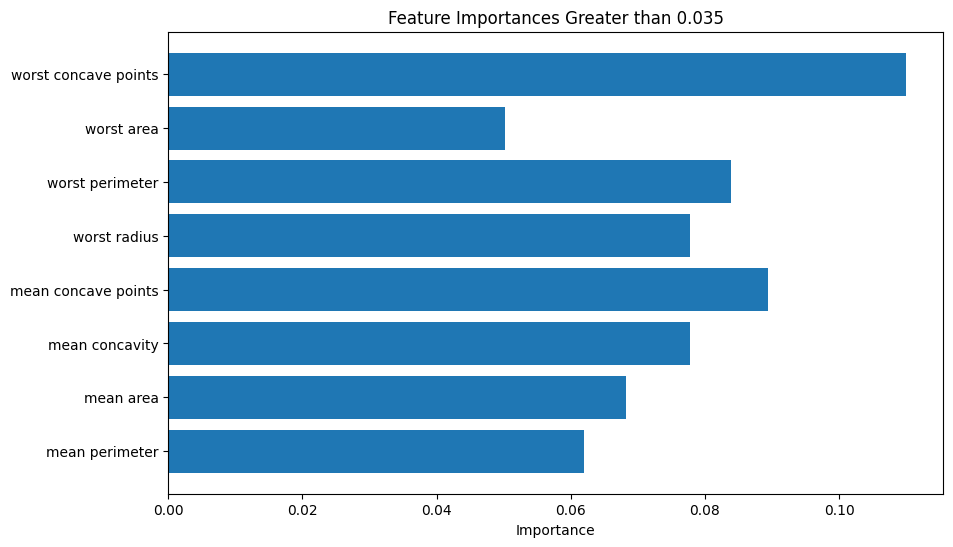

In [170]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_
threshold = 0.05
important_features = cancer_dataset.feature_names[importances > threshold]
important_importances = importances[importances > threshold]
print(len(important_importances))
plt.figure(figsize=(10, 6))
plt.barh(important_features, important_importances)
plt.xlabel('Importance')
plt.title('Feature Importances Greater than 0.035')
plt.yticks(rotation=0, ha='right')
plt.show()


# Chapter 9
- **Evaluation the performance of Machine learning algorithms with resampling**
- Train and Test Sets
- K-Fold Cross Validation
- Leave One Out Cross Validation
- Repeated Random Test-Train Splits

### : Two ways to evaluate algorithms
1. Make predictions for data you already have the target for
2. Use techniques from statistics called **resampling methods** that allow you to make accurate estimates for how well your algorithm will perform on new data

### : New Terms
- What are **resampling methods**?
- "Model evaluation" is an estimate, not a guarantee of performance
- Once we estimate the performance of our algorithm, we can then **re-train** the **final algorithm** on the **entire training dataset** and get it ready for operational use.

### Split into Train and Test Sets
- The simplest method
- Used to evaluate the performance of an algorithm
- Fast and ideal for large datasets and slow algorithms
- Ensure that both splits are representative of the underlying problem
- Use the random_seed parameter to ensure the split is exactly the same when testing different algorithms

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Declare X and y

In [7]:
cancer_dataset = load_breast_cancer()
X = cancer_dataset.data
y = cancer_dataset.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [188]:
model = LogisticRegression(max_iter=10000)

In [189]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [190]:
model.score(X_test, y_test)

0.951048951048951

### K-Fold Cross Validation
- This approach has less variance than the single Train_Test_Split function
- Split the data in k number of parts, each part is called a **fold**
- The algorithm is trained on k-1 of the parts then tested on the left out **test fold**
- This is repeated for each number of **folds**
- Each **test fold** has a performance score that is summarized using a **mean** and **standard deviation**
- The result of this is a more reliable estimate of the performance of the algorithm on **new data**
- Because; the algorithm is trained and evaluated multiple times of different data
- Be aware of the **k** value, it should be large enough to represent the problem, but allowing enough repetitions
- Datasets in the thousands; *k* values of 3, 5 and 10 are common...

In [193]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [194]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [195]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.svm import SVC
model = SVC() 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
from sklearn.neural_network import MLPClassifier
model  = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

In [196]:
results = cross_val_score(model, X, y, cv=KFold(n_splits=10, random_state=0, shuffle=True))
print(results)
print("Accuracy: %.2f%%" % (results.mean()*100.0))
print("Standard Deviation: %.2f%%" % (results.std()*100.0))

[0.877 0.947 0.965 0.965 0.877 0.877 0.93  0.877 0.982 0.929]
Accuracy: 92.27%
Standard Deviation: 4.01%


### Leave One Out

In [197]:
from sklearn.model_selection import LeaveOneOut
results = cross_val_score(model, X, y, cv=LeaveOneOut())
print(len(X))
print(len(results))
print((results))
print("Accuracy: %.2f%%" % (results.mean()*100.0))
print("Standard Deviation: %.2f%%" % (results.std()*100.0))

569
569
[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

### Repeated Random Test-Train Splits 

In [198]:
from sklearn.model_selection import ShuffleSplit

In [199]:
model = LogisticRegression(solver='liblinear')

In [200]:
results = cross_val_score(model, X, y, cv=ShuffleSplit(n_splits=10, test_size=0.33, random_state=7))
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.521% (1.428%)


# Chap 10

### Area Under ROC Curve
- **Binary Classification Problem**
  - Receiver Operating Characteristic - Area Under Curve
  - It calculates how well the model can distinguish between two classes  
- **Multi-Class Classification Problem**
  - One-vs-One (ovo): Compare every class with every other class
  - One-vs-Rest (ovr): Compare each class with all others combined

In [201]:
scoring = 'roc_auc'
results = cross_val_score(model, X, y, scoring=scoring)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
results

Accuracy: 99.268% (0.530%)


array([0.995, 0.992, 0.997, 0.983, 0.997])

# Chap 16 Algorithm Tuning

In [1]:
import numpy
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha = alphas)
model = RidgeClassifier()

In [3]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 3)

In [9]:
grid.fit(X, y)

GridSearchCV(cv=3, estimator=RidgeClassifier(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [10]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)


0.9596027104799035
0.0001


# Futures
- https://wisdomml.in/breast-cancer-prediction-using-machine-learning/
- 1992_CenterForParallelOptimisation.pdf
